In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9G0PSgYsI3azRVBOlE3p")
project = rf.workspace("dhamzyy").project("crash-detection-0qbaa")
version = project.version(2)
dataset = version.download("coco")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 34.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 91.0 MB/s eta 0:00:00:00:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-sto


Extracting Dataset Version Zip to Crash-Detection-2 in coco:: 100%|██████████| 8650/8650 [00:01<00:00, 5946.07it/s]


In [2]:
!pip install -q rfdetr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 5.7 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 9.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 1.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from rfdetr import RFDETRBase

model = RFDETRBase()


model.train(
    dataset_dir=dataset.location,
    epochs=1,
    batch_size=2,
    img_size=480,
    lr=0.0001,
    save_dir="checkpoints",
    save_interval=10,
    val_interval=1,
    output_dir="rf-detr_output",
    device="cuda",
    early_stopping=True
)

2025-08-06 01:10:01.414848: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754442601.602024      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754442601.653517      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
rf-detr-base.pth: 100%|██████████| 355M/355M [00:03<00:00, 93.2MiB/s] 


Loading pretrain weights
TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir rf-detr_output' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=4, grad_accum_steps=4, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=2, weight_decay=0.0001, epochs=1, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-base.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[2, 5, 8, 11], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=3, dim_feedforward=2048, hidden_d

fatal: not a git repository (or any of the parent directories): .git


Done (t=0.55s)
creating index...
index created!
[840]
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
[840]
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Get benchmark
Start training
Grad accum steps:  4
Total batch size:  8
LENGTH OF DATA LOADER: 813


Epoch: [0]  [  0/813]  eta: 1:05:05  lr: 0.000100  class_error: 31.73  loss: 9.6969 (9.6969)  loss_ce: 1.1199 (1.1199)  loss_bbox: 0.6233 (0.6233)  loss_giou: 0.6221 (0.6221)  loss_ce_0: 1.0175 (1.0175)  loss_bbox_0: 0.7014 (0.7014)  loss_giou_0: 0.7434 (0.7434)  loss_ce_1: 1.1023 (1.1023)  loss_bbox_1: 0.6297 (0.6297)  loss_giou_1: 0.6468 (0.6468)  loss_ce_enc: 1.0421 (1.0421)  loss_bbox_enc: 0.7196 (0.7196)  loss_giou_enc: 0.7288 (0.7288)  loss_ce_unscaled: 1.1199 (1.1199)  class_error_unscaled: 31.7308 (31.7308)  loss_bbox_unscaled: 0.1247 (0.1247)  loss_giou_unscaled: 0.3111 (0.3111)  cardinality_error_unscaled: 361.0000 (361.0000)  loss_ce_0_unscaled: 1.0175 (1.0175)  loss_bbox_0_unscaled: 0.1403 (0.1403)  loss_giou_0_unscaled: 0.3717 (0.3717)  cardinality_error_0_unscaled: 3051.5000 (3051.5000)  loss_ce_1_unscaled: 1.1023 (1.1023)  loss_bbox_1_unscaled: 0.1259 (0.1259)  loss_giou_1_unscaled: 0.3234 (0.3234)  cardinality_error_1_unscaled: 2322.0000 (2322.0000)  loss_ce_enc_unscale

In [11]:
import supervision as sv

ds = sv.DetectionDataset.from_coco(
    images_directory_path=f"{dataset.location}/test",
    annotations_path=f"{dataset.location}/test/_annotations.coco.json",
)

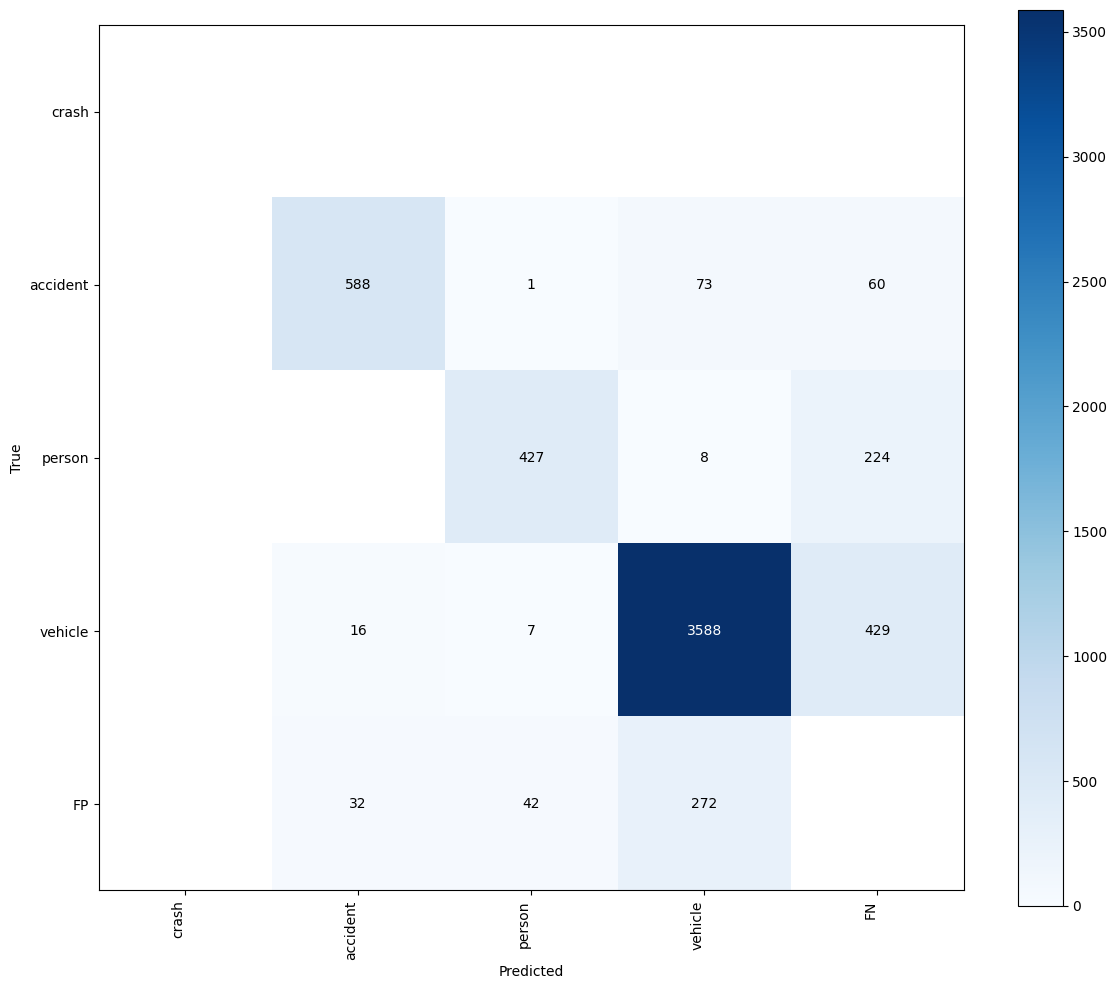

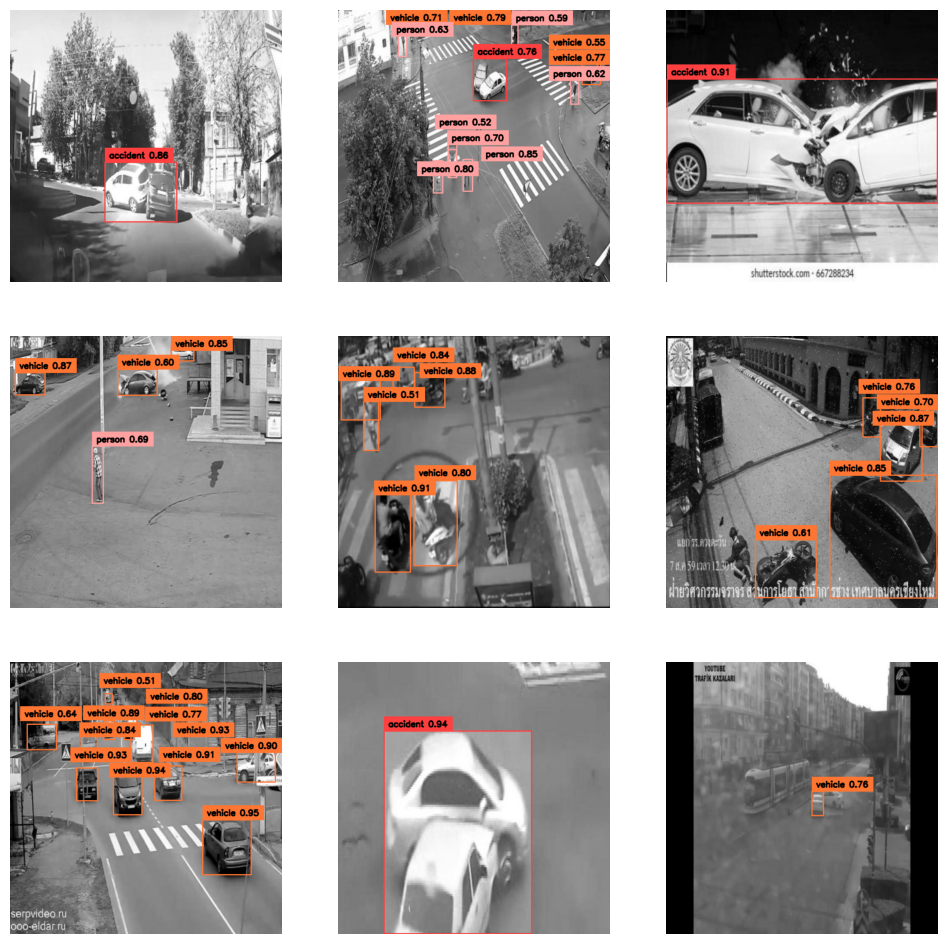

In [12]:
import supervision as sv
from rfdetr import RFDETRBase
from PIL import Image

detections_images = []

for i in range(9):
    path, image, annotations = ds[i]
    image = Image.open(path)

    detections = model.predict(image, threshold=0.5)

    text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
    thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

    bbox_annotator = sv.BoxAnnotator(thickness=thickness)
    label_annotator = sv.LabelAnnotator(
        text_color=sv.Color.BLACK,
        text_scale=text_scale,
        text_thickness=thickness,
        smart_position=True)

    detections_labels = [
        f"{ds.classes[class_id]} {confidence:.2f}"
        for class_id, confidence
        in zip(detections.class_id, detections.confidence)
    ]

    detections_image = image.copy()
    detections_image = bbox_annotator.annotate(detections_image, detections)
    detections_image = label_annotator.annotate(detections_image, detections, detections_labels)

    detections_images.append(detections_image)

sv.plot_images_grid(images=detections_images, grid_size=(3, 3), size=(12, 12))

In [6]:
import supervision as sv
from tqdm import tqdm
from supervision.metrics import MeanAveragePrecision

targets = []
predictions = []

for path, image, annotations in tqdm(ds):
    image = Image.open(path)
    detections = model.predict(image, threshold=0.5)

    targets.append(annotations)
    predictions.append(detections)

100%|██████████| 1130/1130 [00:45<00:00, 24.79it/s]


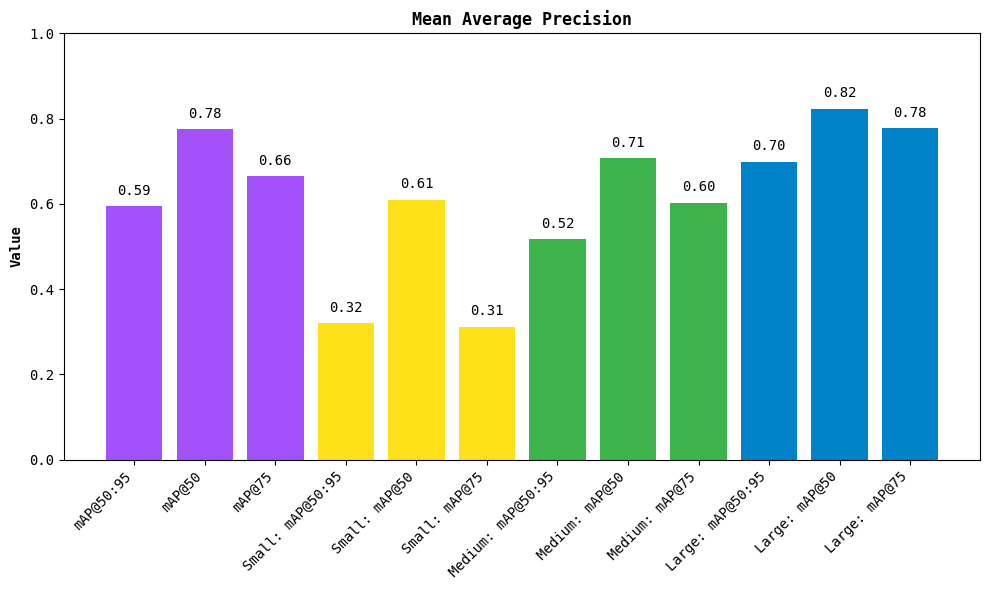

In [7]:
map_metric = MeanAveragePrecision()
map_result = map_metric.update(predictions, targets).compute()

map_result.plot()

In [8]:
print(map_result)

Average Precision (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.594
Average Precision (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.776
Average Precision (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.664
Average Precision (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.320
Average Precision (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ]                 = 0.517
Average Precision (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ]                 = 0.698


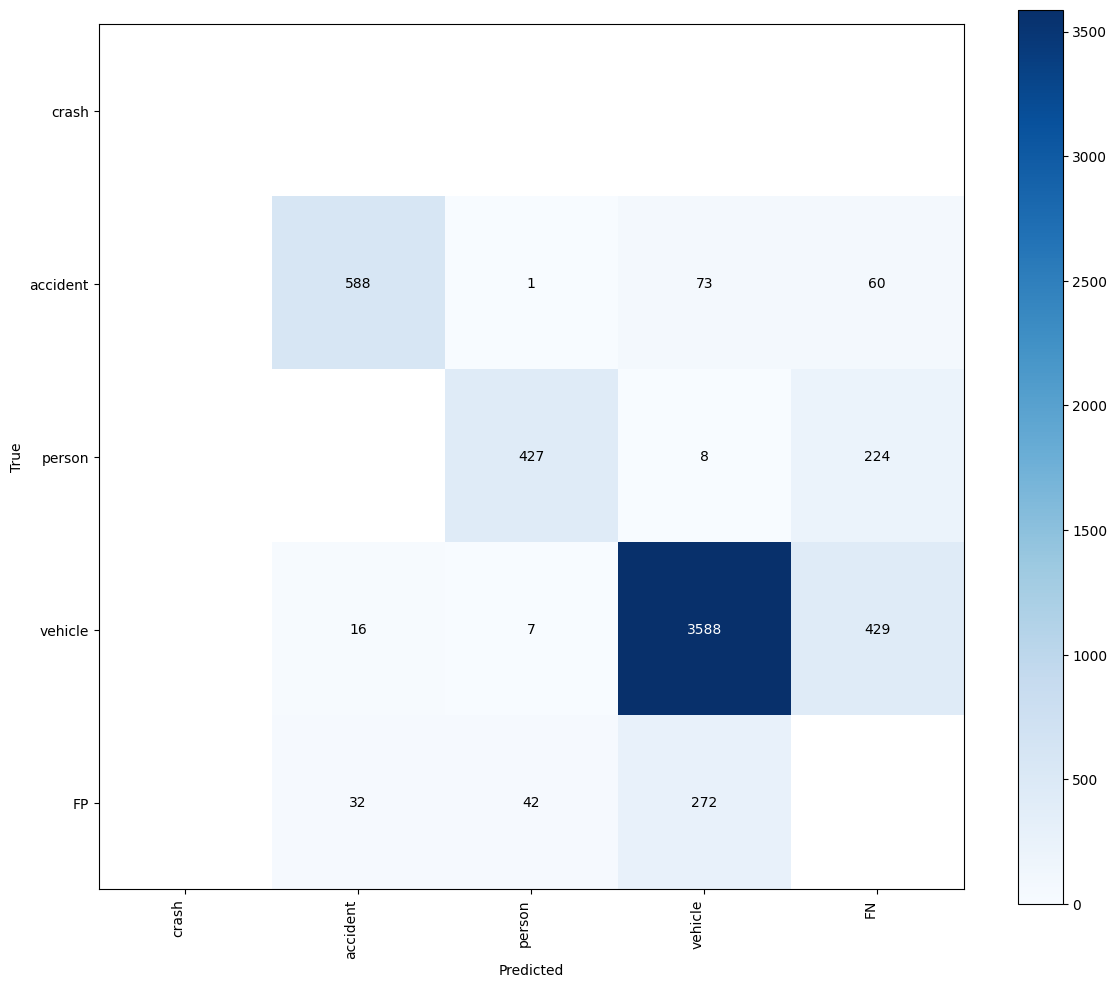

In [9]:
confusion_matrix = sv.ConfusionMatrix.from_detections(
    predictions=predictions,
    targets=targets,
    classes=ds.classes
)

confusion_matrix.plot()

In [10]:
import numpy as np

# confusion_matrix.matrix is an (N×N) array where
#   row i = actual class i  
#   col j = predicted class j
cm = confusion_matrix.matrix  
classes = ds.classes

# True positives are the diagonal
tp = np.diag(cm)

# False positives = sum of each predicted-column minus the TP
fp = cm.sum(axis=0) - tp

# False negatives = sum of each actual-row minus the TP
fn = cm.sum(axis=1) - tp

# Avoid division by zero
precision = tp / (tp + fp + 1e-8)
recall    = tp / (tp + fn + 1e-8)
f1        = 2 * (precision * recall) / (precision + recall + 1e-8)

print("Per-class metrics:")
for cls, p, r, f in zip(classes, precision, recall, f1):
    print(f"  {cls:10s} • P = {p:.3f},  R = {r:.3f},  F1 = {f:.3f}")

# you can also compute macro-averages if you want:
print("\nMacro-avg precision:", precision.mean().item())
print("Macro-avg recall   :", recall.mean().item())
print("Macro-avg F1       :", f1.mean().item())

Per-class metrics:
  crash      • P = 0.000,  R = 0.000,  F1 = 0.000
  accident   • P = 0.925,  R = 0.814,  F1 = 0.866
  person     • P = 0.895,  R = 0.648,  F1 = 0.752
  vehicle    • P = 0.910,  R = 0.888,  F1 = 0.899

Macro-avg precision: 0.546027064817489
Macro-avg recall   : 0.470094937113798
Macro-avg F1       : 0.5033750753260756
